In [ ]:
import numpy as np
from PIL import Image
import numpy as np
import cv2
import os
from os import listdir
from numpy import asarray
np.set_printoptions(threshold=np.inf)
import seaborn as sns


In [ ]:
!pip install patool

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 3.1 MB/s 


In [ ]:
import patoolib

In [ ]:
from google.colab import drive
drive.flush_and_unmount()

Drive not mounted, so nothing to flush and unmount.


In [ ]:
patoolib.extract_archive('/content/Data.zip')

patool: Extracting /content/Data.zip ...
patool: running /usr/bin/7z x -o./Unpack_ds4xr6_h -- /content/Data.zip
patool: ... /content/Data.zip extracted to `Data'.


'Data'

In [ ]:
directory ='/content/Data/Train'
X = np.ones([2400, 785 ])
for i in range(2400):
  curri = i+1
  newdirectory = directory+"/" + str(curri) + ".jpg"
  img = Image.open(newdirectory)
  image = np.asarray(img).flatten()
  image = np.append(image, [1])
  X[i] =  image






**getting the x tilda**

In [ ]:
def getTotal(X):
  Xtranspose=X.transpose()
  product1=Xtranspose.dot(X)
  inverse = np.linalg.pinv(product1)
  total=inverse.dot(Xtranspose)
  return total


**getting the first part of the equation as its constant with the different t values ill calculate**

In [ ]:
total=getTotal(X)





**save the return value of get total**

In [ ]:
def getT(digit):
    T = np.ones([2400])
    T *= -1
    index =digit*240
    for i in range (240):
        T[index+i] +=2
    return T


**getting the t value which will be ones for the specific digit, and -1s for the rest**

In [ ]:
weights = []
for t in range(10):
   W=total.dot(getT(t))
   weights.append(W)
   print(len(weights))




**getting the weights using different t values for each digit and saved it in an array for trying them with the test images**

In [ ]:

total=getTotal(X)
result=np.ones([200])
for i in range(200):
  curri = i+1
  newdirectory2 = '/content/Data/Test/' + str(curri) + ".jpg"
  img = Image.open(newdirectory2)
  image = np.asarray(img).flatten()
  image = np.append(image, [1])
  tests=np.zeros([10])
  for j in range(10):
    currW=weights[j]
    tests[j]=np.matmul(image,currW)
  max=np.argmax(tests)
  result[i]= max


**trying the different weights i got with each test images **

In [ ]:
originalLabels = np.genfromtxt("/content/Data/Test/Test Labels.txt", delimiter = ",")
originalLabels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8.,
       8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 9., 9., 9., 9., 9., 9., 9.,
       9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9.])

In [ ]:
result

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 6., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 2., 2., 0., 4., 3., 2., 3.,
       2., 1., 5., 2., 2., 4., 2., 2., 2., 3., 3., 3., 3., 5., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 8., 8., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 5., 4., 4., 7., 4., 4., 4., 4., 4., 4., 9., 8., 5.,
       5., 3., 5., 5., 5., 5., 5., 5., 9., 8., 6., 5., 5., 5., 9., 5., 5.,
       5., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 7., 7., 7., 7., 7., 7., 7., 7., 7., 9., 7., 9., 2.,
       7., 9., 7., 7., 7., 7., 3., 8., 5., 8., 9., 5., 8., 8., 8., 8., 8.,
       8., 8., 8., 2., 8., 8., 8., 8., 8., 5., 9., 7., 9., 7., 7., 9., 3.,
       5., 9., 9., 4., 9., 9., 9., 7., 9., 9., 0., 9., 9.])

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(originalLabels,result)
cm

array([[19,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0, 20,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  3, 11,  2,  2,  1,  0,  0,  0,  0],
       [ 0,  0,  0, 17,  0,  1,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 17,  1,  0,  1,  0,  1],
       [ 0,  0,  0,  1,  0, 14,  1,  0,  2,  2],
       [ 0,  0,  0,  0,  0,  0, 20,  0,  0,  0],
       [ 0,  0,  1,  1,  0,  0,  0, 15,  0,  3],
       [ 0,  0,  1,  0,  0,  3,  0,  0, 15,  1],
       [ 1,  0,  0,  1,  1,  1,  0,  4,  0, 12]], dtype=int64)

**confusion matrix of the original labels vs the labels i got in my results array**

<AxesSubplot: >

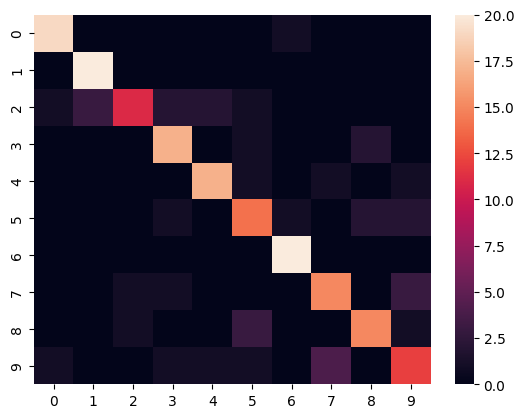

In [ ]:
sns.heatmap(cm)